# Quick example to fit a baseline


In [1]:
%matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

import rampy
from sklearn import preprocessing

# Creating a signal

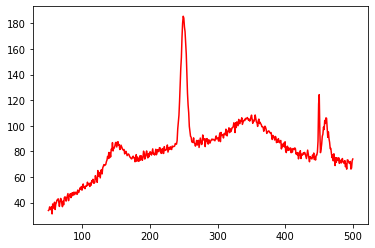

In [2]:
nb_points  =500
x = np.linspace(50, 500, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

plt.plot(x,y,"r-")

# Now using different baselines to retrieve the true background

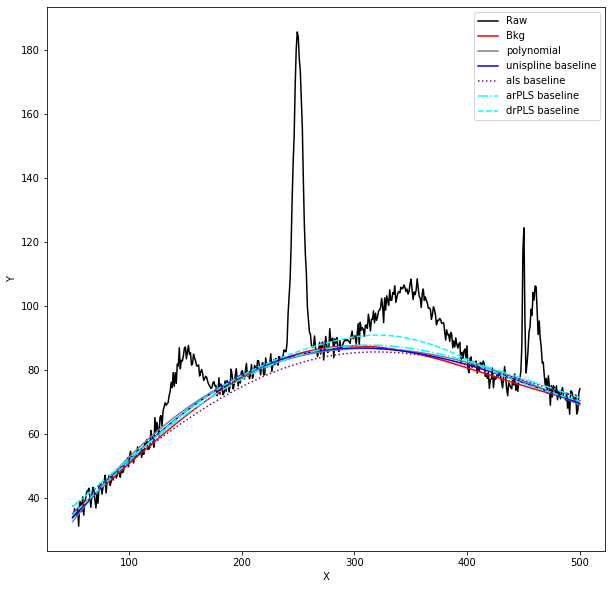

In [3]:
# need to define some fitting regions for the spline
roi = np.array([[0,100],[200,220],[280, 290],[420,430],[480,500]])

# calculating the baselines
ycalc_poly, base_poly = rampy.baseline(x,y,roi,'poly',polynomial_order=3 )
#ycalc_gcvspl, base_gcvspl = rampy.baseline(x,y,roi,'gcvspline',s=0.1 ) # activate if you have installed gcvspline
ycalc_uni, base_uni = rampy.baseline(x,y,roi,'unispline',s=1e0)
ycalc_als, base_als = rampy.baseline(x,y,roi,'als',lam=10**7,p=0.05)
ycalc_arpls, base_arpsl = rampy.baseline(x,y,roi,'arPLS',lam=10**7,ratio=0.001)
ycalc_drpls, base_drpsl = rampy.baseline(x,y,roi,'drPLS')

# doing the figure
plt.figure(figsize=(10,10))
plt.plot(x,y,"k-",label="Raw")
plt.plot(x,bkg,"r-",label="Bkg")

plt.plot(x,base_poly,"-",color="grey",label="polynomial")
plt.plot(x,base_uni,"b-",label="unispline baseline")
#plot(x,base_gcvspl,"-",color="orange",label="gcvspline baseline") # activate if you have installed gcvspline
plt.plot(x,base_als,":",color="purple",label="als baseline")
plt.plot(x,base_arpsl,"-.",color="cyan",label="arPLS baseline")
plt.plot(x,base_drpsl,"--",color="cyan",label="drPLS baseline")

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()

In [4]:
help(rampy.baseline)

Help on function baseline in module rampy.baseline:

baseline(x_input, y_input, bir, method, **kwargs)
    Allows subtracting a baseline under a x y spectrum.
    
    Parameters
    ----------
    x_input : ndarray
        x values.
    y_input : ndarray
        y values.
    bir : ndarray
        Contain the regions of interest, organised per line.
        For instance, roi = np.array([[100., 200.],[500.,600.]]) will
        define roi between 100 and 200 as well as between 500 and 600.
        Note: This is NOT used by the "als" and "arPLS" algorithms, but still is a requirement when calling the function.
        bir and method probably will become args in a futur iteration of rampy to solve this.
    method : str
        "poly": polynomial fitting, with splinesmooth the degree of the polynomial.
        "unispline": spline with the UnivariateSpline function of Scipy, splinesmooth is
                     the spline smoothing factor (assume equal weight in the present case);
        